### This dataset represents the behaviour of customers that have been using a subscription service and have either stayed on or left. The purpose of this project is build a model that will help us identify which behaviours will indicate a person's likelyhood of churning. From there the inferences can inform stakeholders in marketing and management about what they can do to better meet the needs of customers and reduce the overall churn rate.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

import warnings
warnings.filterwarnings('ignore')

In [3]:
dataset = pd.read_csv("churn_data.csv")

In [4]:
dataset.head()

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,...,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,...,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,...,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,...,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,...,0,0,0,0,Aries,1,0,1.0,0.03,0


In [5]:
dataset.describe()

,user,churn,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
count,27000.000000,27000.000000,26996.000000,18969.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,...,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,23773.000000,27000.000000,27000.000000
mean,35422.702519,0.413852,32.219921,542.944225,3.341556,0.307000,28.062519,3.273481,0.073778,92.625778,...,0.420926,0.001296,0.018815,0.018185,0.004889,0.173444,0.018074,29.110125,0.907684,0.318037
std,20321.006678,0.492532,9.964838,61.059315,9.131406,1.055416,42.219686,8.953077,0.437299,88.869343,...,0.912831,0.035981,0.135873,0.133623,0.069751,0.378638,0.133222,21.973478,0.752016,0.465723
min,1.000000,0.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,17810.500000,0.000000,25.000000,507.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.200000,0.000000
50%,35749.000000,0.000000,30.000000,542.000000,0.000000,0.000000,9.000000,0.000000,0.000000,65.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.780000,0.000000
75%,53244.250000,1.000000,37.000000,578.000000,1.000000,0.000000,43.000000,1.000000,0.000000,164.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000,1.530000,1.000000
max,69658.000000,1.000000,91.000000,838.000000,65.000000,29.000000,1067.000000,63.000000,29.000000,522.000000,...,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,114.000000,4.000000,1.000000


In [6]:
#easy way of seeing how many rows/records are in a dataframe
dataset.shape[0]

27000

In [7]:
# this can tell us what percent of the data in each column are null values
round((dataset.isna().sum() /27000) * 100, 2)

user                        0.00
churn                       0.00
age                         0.01
housing                     0.00
credit_score               29.74
deposits                    0.00
withdrawal                  0.00
purchases_partners          0.00
purchases                   0.00
cc_taken                    0.00
cc_recommended              0.00
cc_disliked                 0.00
cc_liked                    0.00
cc_application_begin        0.00
app_downloaded              0.00
web_user                    0.00
app_web_user                0.00
ios_user                    0.00
android_user                0.00
registered_phones           0.00
payment_type                0.00
waiting_4_loan              0.00
cancelled_loan              0.00
received_loan               0.00
rejected_loan               0.00
zodiac_sign                 0.00
left_for_two_month_plus     0.00
left_for_one_month          0.00
rewards_earned             11.95
reward_rate                 0.00
is_referre

Depending on the amount of null values that are found, I can delete records that are do not have enough composite data to provide a reliable output. If the null values are concentrated in certain columns it may be prudent to delete those columns, excluding them from the final model.

In [8]:
#this sytax deletes all records that have a null value in the age column
# there are four null values in "age" and thus four full records will be deleted
dataset = dataset[pd.notnull(dataset["age"])]

In [9]:
#this drops the columns 'credit_score' and 'rewards_earned' from the dataframe
dataset = dataset.drop(columns= ['credit_score', 'rewards_earned'])

In [10]:
dataset2 = dataset.drop(columns= ['user', 'churn'])

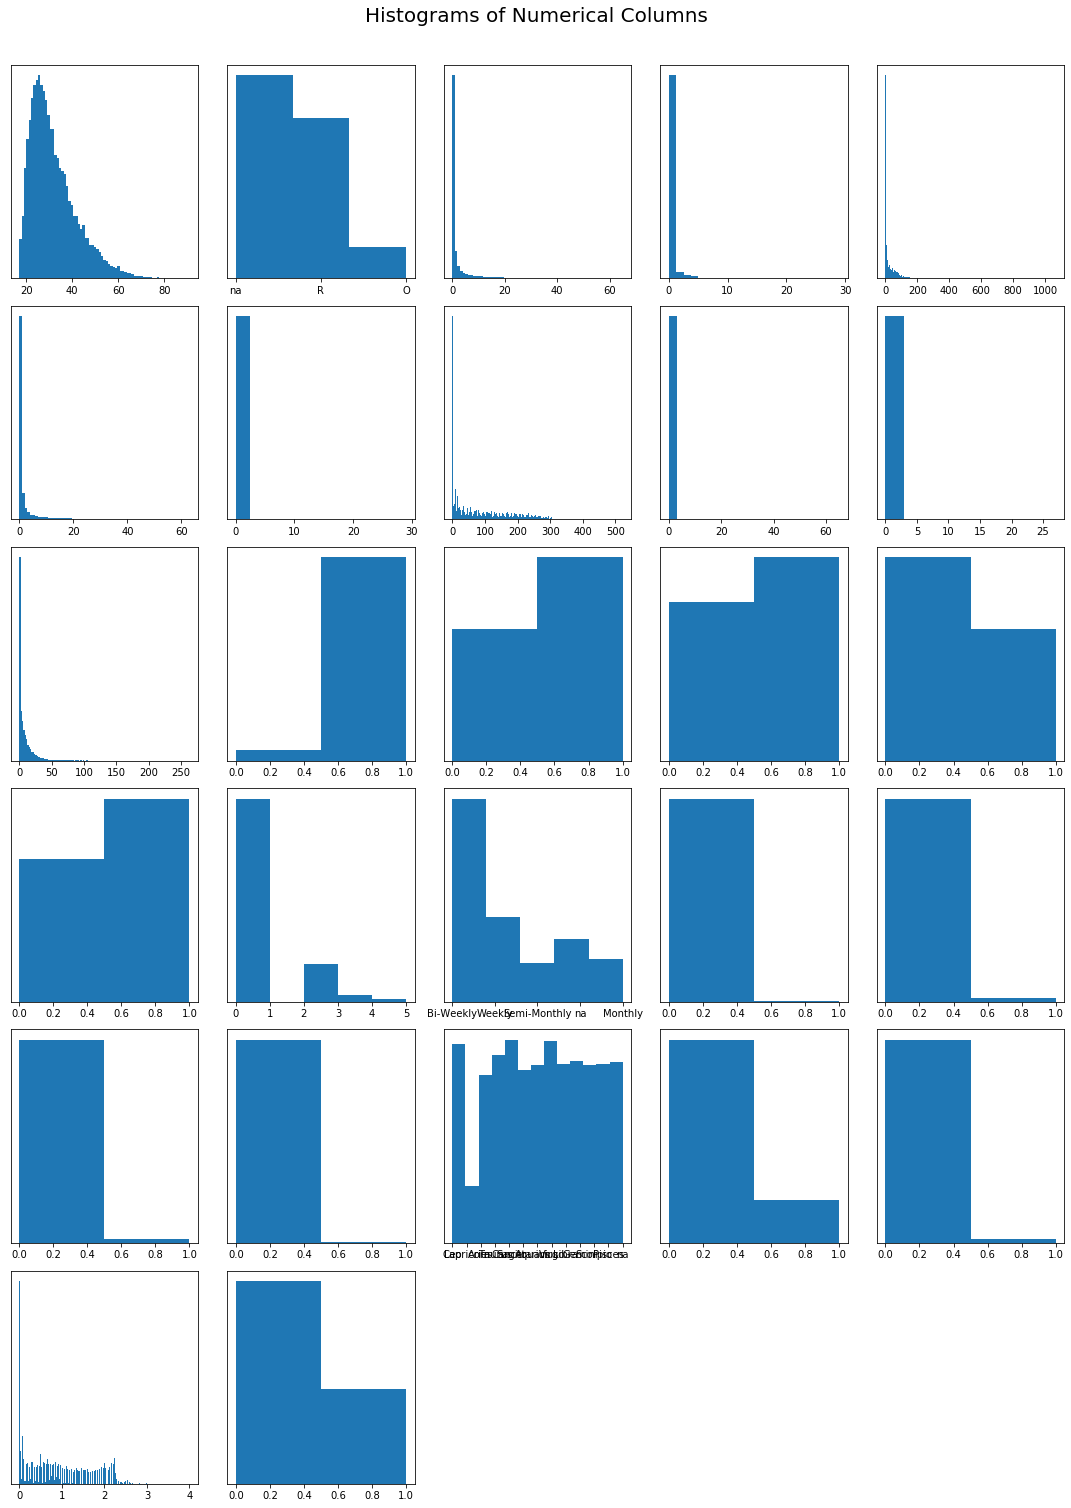

In [11]:
#this sub plot can give a general idea of the distribution of the data

fig = plt.figure(figsize= (15, 22))
plt.suptitle("Histograms of Numerical Columns", fontsize=20)
for i in range(1, dataset2.shape[1] + 1):
    plt.subplot( 6, 5, i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    
    vals = np.size(dataset2.iloc[:, i -1].unique())
    
    plt.hist(dataset2.iloc[:, i - 1], bins=vals)
plt.tight_layout(rect= [0, 0.03, 1, 0.95])

In [12]:
#explore the binary columns in this dataset. I will create a new dataframe with just binary values
dataset2 = dataset[['housing', 'is_referred', 'app_downloaded',
                    'web_user', 'app_web_user', 'ios_user', 
                    'android_user', 'registered_phones', 'payment_type',
                    'waiting_4_loan', 'cancelled_loan', 'received_loan', 'rejected_loan', 'zodiac_sign',
                    'left_for_two_month_plus', 'left_for_one_month', 'is_referred']]

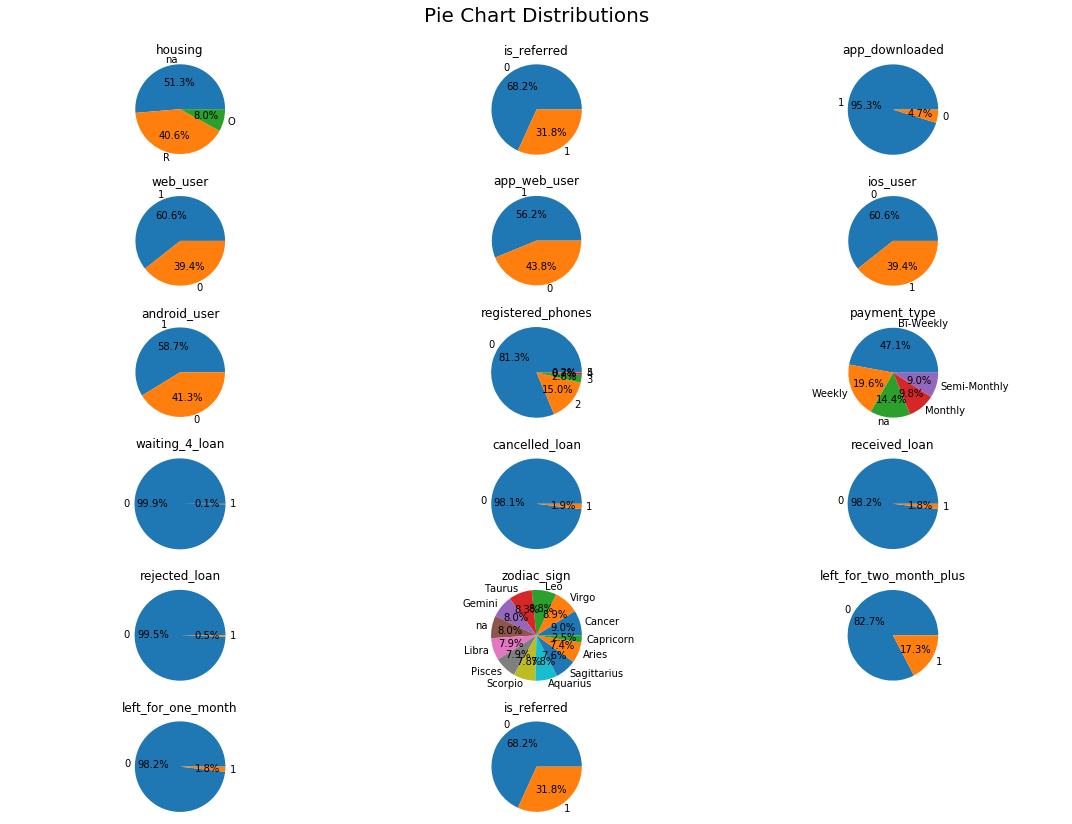

In [13]:
#this code will create pie charts for each binary/categorical column to measure the proportion of each value
fig = plt.figure(figsize= (15, 12))
plt.suptitle("Pie Chart Distributions", fontsize=20)
for i in range(1, dataset2.shape[1] + 1):
    plt.subplot(6, 3, i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset2.columns.values[i - 1])
    values = dataset2.iloc[:, i -1].value_counts(normalize = True).values
    index = dataset2.iloc[:, i -1].value_counts(normalize = True).index
    
    plt.pie(values, labels = index, autopct= '%1.1f%%')
    plt.axis('equal')
plt.tight_layout(rect= [0, 0.03, 1, 0.95])

In [14]:
# this sytax asks to return the value counts for churn where waiting_4_loan is equal to 1
dataset[dataset2.waiting_4_loan == 1].churn.value_counts()

0    27
1     8
Name: churn, dtype: int64

In [15]:
#for this I want the same thing but for where cancelled_loan values are equal to 1
dataset[dataset2.cancelled_loan == 1].churn.value_counts()

1    274
0    234
Name: churn, dtype: int64

In [16]:
dataset[dataset2.received_loan == 1].churn.value_counts()

1    292
0    199
Name: churn, dtype: int64

In [17]:
dataset[dataset2.rejected_loan == 1].churn.value_counts()

1    107
0     25
Name: churn, dtype: int64

In [18]:
dataset[dataset2.left_for_one_month == 1].churn.value_counts()

1    266
0    222
Name: churn, dtype: int64

This exploratory analysis has shown which categories are uneven and how uneven they are. This breakdown also shows whether columns that have a small level of uneveness contain both values of the target variable.

I can now look at the correlation between the the independent variables and the target variables.

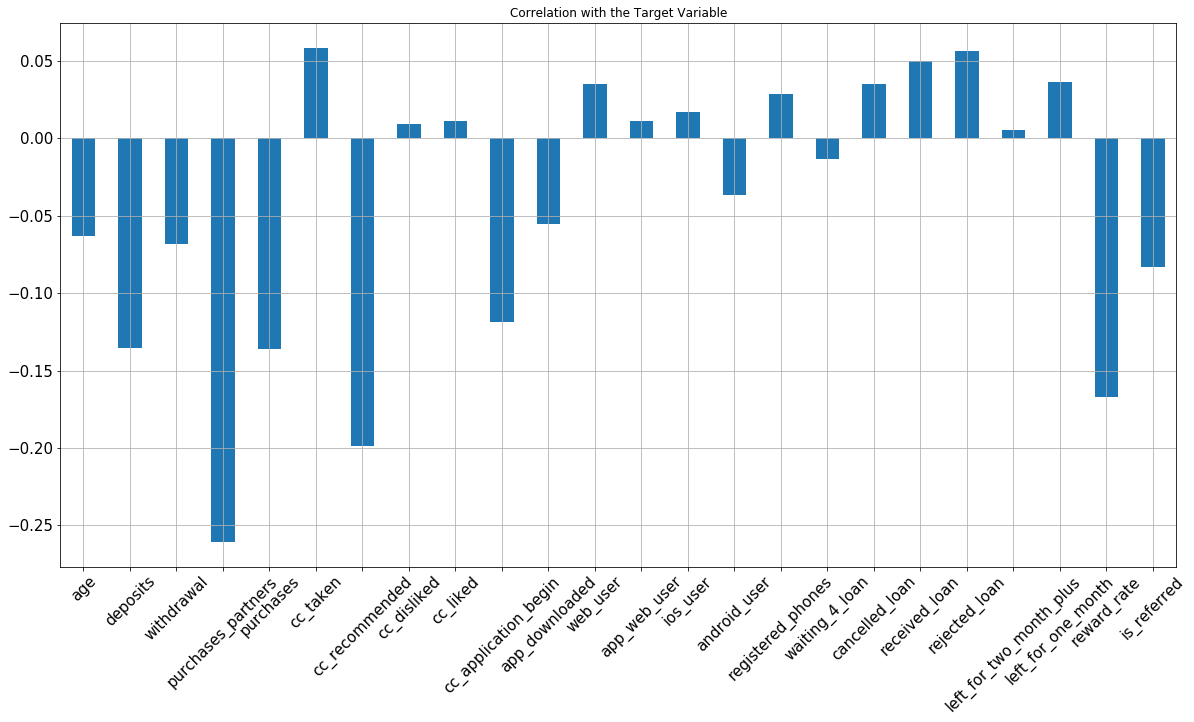

In [19]:
# drop all the columns that do not have meaningful numeric or categorical data 
# and plot the remaining columns in relation to the correlation of the target variable

dataset.drop(columns = ['churn', 'user', 'housing',
                        'payment_type', 'zodiac_sign']).corrwith(dataset.churn).plot.bar(
        figsize = (20, 10), title = 'Correlation with the Target Variable', fontsize= 15,
        rot = 45, grid = True)

The above chart gives some interesting insight into the related behaviours of the users. There are negative correlations with churn rate with the first five independent variables. There is also an interesting positive correlation between people that took credit cards with the comapny and churn rate. This could potentially mean that people might be having complaints with the credit card rates or policies. It's important to investigate trends like this not only in the data, but also to follow up with customers to see if they are indeed having problems with the credit card.

It is important to keep in mind that much of these correlations are small, but the direction of the correlation may be able to give us a sense of what is going in in the data.

As a side note it's very important to know ahead of time what each columns stands for in the real world. Some columns may be inutive but others not so much.

In addition to finding the correlations between the independent variables and the target variable, it is important to look at the independent variables themselves and see if there are correlations among them. Dependencies in between the features can negatively influence the model, so it's a good idea to check.

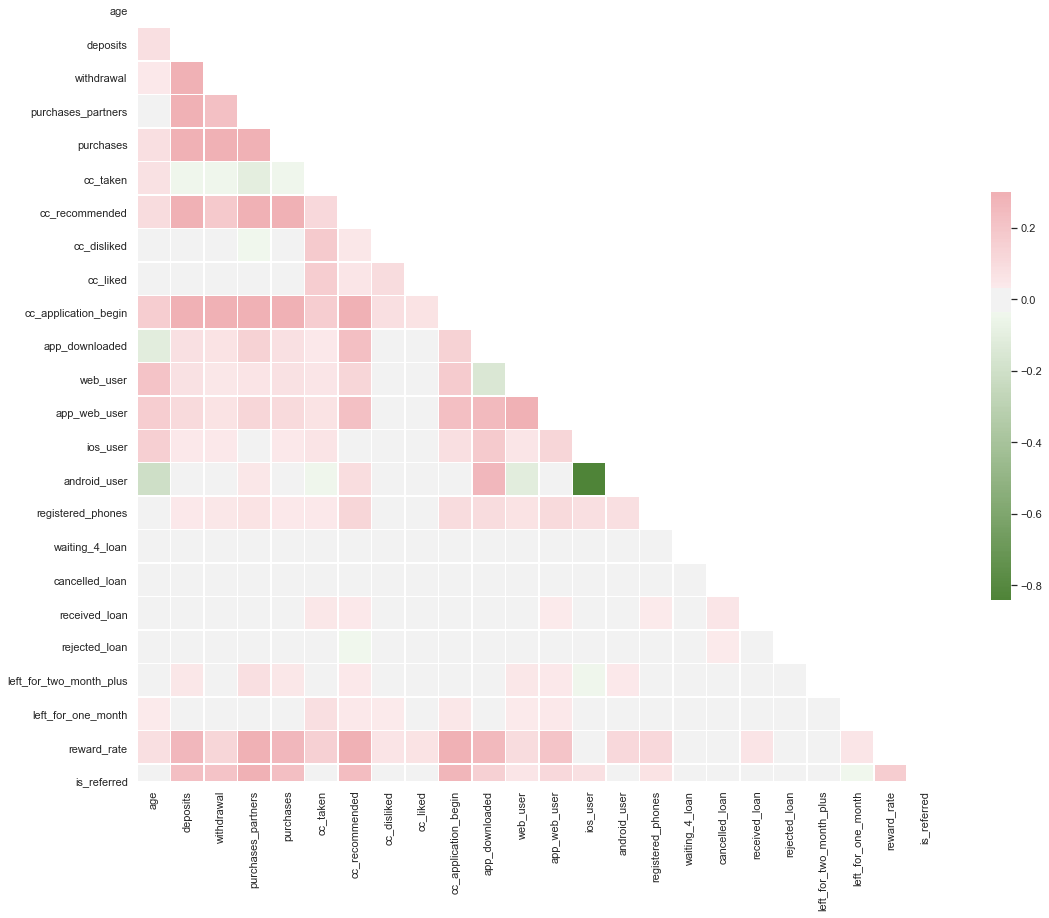

In [20]:
#setting up the correlation matrix styling
sb.set(style= 'white')

#creating the correlation matrix
corr = dataset.drop(columns = ['user', 'churn']).corr()

#creating a mask for the upper triangle of the correlation matrix
mask = np.zeros_like(corr, dtype= np.bool)
mask[np.triu_indices_from(mask)] = True

#setting up the matplot lib figure
f, ax = plt.subplots(figsize=(18, 15))

# setting up a color scheme that is color diverging
cmap = sb.diverging_palette(120, 10, as_cmap=True)

#putting it all together. Drawing the heatmap with the mask and the correct apsect ratio
sb.heatmap(corr, mask= mask, cmap= cmap, vmax= 0.3, center=0,
           square= True, linewidths= 0.5, cbar_kws= {"shrink": 0.5})

Looking at this correlation matrix, it is evident that there is strong negative correlation between two variables shown by the green square. This makes sense as these categories are generally mutually exclusive (those that have iphones generally don't also have androids).

There also appears to be strong positive correlations with 'reward_rate', 'is_referred', and 'cc_appliction_begin' across several other variables. However, it's important to note that none of the positive correlations in the matrix reach above approximately 0.25. This means that the correlations are not high enough to significantly affect the model later on.

Additinally, it is important to remember that the variable 'app_web_user' is a variable created from two other variables and thus is inherently a variable that will be correlated with those two variables. This means that we have t exclude this variable from the model. Again this is one reason why we have to be aware of what each colmun means in real life before including it into the model


In [21]:
dataset = dataset.drop(columns= ["app_web_user"])

In [22]:
dataset.to_csv("cleaned_churn_data.csv", index= False)

In [23]:
dataset = pd.read_csv('cleaned_churn_data.csv')

In [24]:
user_identifier = dataset['user']
dataset = dataset.drop(columns = ['user'])

In [25]:
# we need to apply one-hot encoding to our categorical variables
dataset.housing.value_counts()
dataset = pd.get_dummies(dataset)

In [26]:
dataset.columns

Index(['churn', 'age', 'deposits', 'withdrawal', 'purchases_partners',
       'purchases', 'cc_taken', 'cc_recommended', 'cc_disliked', 'cc_liked',
       'cc_application_begin', 'app_downloaded', 'web_user', 'ios_user',
       'android_user', 'registered_phones', 'waiting_4_loan', 'cancelled_loan',
       'received_loan', 'rejected_loan', 'left_for_two_month_plus',
       'left_for_one_month', 'reward_rate', 'is_referred', 'housing_O',
       'housing_R', 'housing_na', 'payment_type_Bi-Weekly',
       'payment_type_Monthly', 'payment_type_Semi-Monthly',
       'payment_type_Weekly', 'payment_type_na', 'zodiac_sign_Aquarius',
       'zodiac_sign_Aries', 'zodiac_sign_Cancer', 'zodiac_sign_Capricorn',
       'zodiac_sign_Gemini', 'zodiac_sign_Leo', 'zodiac_sign_Libra',
       'zodiac_sign_Pisces', 'zodiac_sign_Sagittarius', 'zodiac_sign_Scorpio',
       'zodiac_sign_Taurus', 'zodiac_sign_Virgo', 'zodiac_sign_na'],
      dtype='object')

In [27]:
#looking at the columns we see that we have new columns for each category
#we can't have correlated columns that are mutually exclusive 
#and thus highly correlated so we need to further exclude csome columns from the model

dataset = dataset.drop(columns = ['housing_na', 'zodiac_sign_na', 'payment_type_na'])

In [28]:
#now to split the data for training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataset.drop(columns= ['churn']), 
                                                    dataset['churn'], test_size=0.2, random_state=0)

In [29]:
y_train.value_counts()

0    12656
1     8940
Name: churn, dtype: int64

In [30]:
12656/ (12656+ 8940)

0.5860344508242267

We see a problem with the value counts of the target variable. because there is a lopsided distribution with about 60% of the values being 0 (no churn). If we were to create a naive predictor that simply labeled every record as 0 we would still get a 60% accuracy. This is bad because even a terrible model seems like it's doing well when it's not.

To solve this problem we have to balance the data. Balancing the data will help us to know if the model is actually performing as it should or if the data is simply off

In [31]:
import random

pos_index = y_train[y_train.values == 1].index
neg_index = y_train[y_train.values == 0].index

#the next two blocks of code will cut down the number of 0 value records to the number of 1 value records 
# by randomingly selecting and returning records with a 0 value up to the length of total records with a 1 value
# this will be done to both X_train and y_train
if len(pos_index) > len(neg_index):
    higher = pos_index
    lower = neg_index
else:
    lower = pos_index
    higher = neg_index

random.seed(0)
higher = np.random.choice(higher, size = len(lower))
lower = np.asarray(lower)
new_indexes = np.concatenate((lower, higher))

X_train = X_train.loc[new_indexes, ]
y_train = y_train[new_indexes]

In [32]:
#we can now see that the values are balanced, helping us to see if the model will be working well
y_train.value_counts()

1    8940
0    8940
Name: churn, dtype: int64

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
#scale both the training and testing set for the independent variables
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))

#the column names were lost in the transformation so they need to be reassigned
X_train2.columns = X_train.columns.values
X_test.columns = X_test.columns.values

#the same thing goes for the index
X_train2.index = X_train.index.values
X_test.index = X_test.index.values

#reassign the names too
X_train = X_train2
X_test = X_test2

In [35]:
X_train.head()

,age,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,...,zodiac_sign_Cancer,zodiac_sign_Capricorn,zodiac_sign_Gemini,zodiac_sign_Leo,zodiac_sign_Libra,zodiac_sign_Pisces,zodiac_sign_Sagittarius,zodiac_sign_Scorpio,zodiac_sign_Taurus,zodiac_sign_Virgo
11695,-0.616598,-0.361873,-0.291956,-0.603943,-0.361602,-0.168636,-0.909005,-0.059143,-0.068479,-0.566916,...,-0.313927,-0.156415,-0.294615,-0.310474,-0.291577,-0.291012,-0.291916,-0.296182,-0.295175,-0.316714
19766,-0.414446,-0.361873,-0.291956,-0.654428,-0.361602,-0.168636,0.321815,0.992033,-0.068479,-0.566916,...,-0.313927,-0.156415,-0.294615,-0.310474,3.429623,-0.291012,-0.291916,-0.296182,-0.295175,-0.316714
8354,0.293087,-0.361873,-0.291956,-0.654428,-0.361602,-0.168636,2.008493,-0.059143,-0.068479,-0.241998,...,-0.313927,-0.156415,-0.294615,-0.310474,-0.291577,-0.291012,-0.291916,-0.296182,-0.295175,3.157424
17883,0.596315,-0.361873,-0.291956,0.052360,-0.361602,-0.168636,-0.179630,-0.059143,-0.068479,0.001690,...,-0.313927,-0.156415,-0.294615,-0.310474,-0.291577,-0.291012,-0.291916,-0.296182,3.387819,-0.316714
25149,-0.818750,-0.247442,-0.291956,-0.099095,-0.244845,-0.168636,-0.578507,-0.059143,-0.068479,-0.241998,...,-0.313927,-0.156415,-0.294615,-0.310474,-0.291577,3.436280,-0.291916,-0.296182,-0.295175,-0.316714


The distribution of y values is now balanced and the values for the independent variables are now scaled, meaning that no one variable will have a disproportionate effect on the model

In [36]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state= 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
y_pred = classifier.predict(X_test)

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [39]:
cm = confusion_matrix(y_test, y_pred)

In [40]:
accuracy_score(y_test, y_pred)

0.6125925925925926

In [41]:
#out of all the predicted positves the model got about half of them right. Not that good
precision_score(y_test, y_pred)

0.5224683544303798

In [42]:
#out of all the actual positives that exist, how many did the model predict as true
recall_score(y_test, y_pred)

0.7390331244404655

In [43]:
f1_score(y_test, y_pred)

0.6121616611049314

Test Data Accuracy: 0.6126


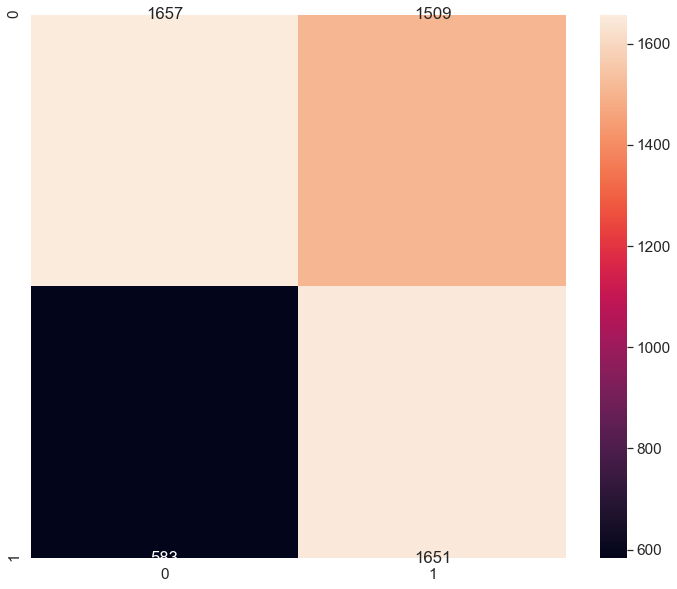

In [44]:
# let's create a heatmap to visualize what happened in the classification

df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (12, 10))
sb.set(font_scale=1.4)
sb.heatmap(df_cm, annot= True, fmt= 'g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

In [45]:
from sklearn.model_selection import cross_val_score

In [46]:
accuracies = cross_val_score(estimator= classifier,
                             X = X_train,
                             y = y_train,
                             cv = 10)

In [47]:
#the predictions across each k fold are fairly consistent
accuracies

array([0.63087248, 0.63478747, 0.651566  , 0.63199105, 0.65548098,
       0.63478747, 0.63422819, 0.63870246, 0.64373602, 0.65715884])

In [48]:
print('Average Accuracy: ', round(accuracies.mean(), 3))
print('Standard Deviation: ', round(accuracies.std(),3))

Average Accuracy:  0.641
Standard Deviation:  0.009


In [49]:
#let's try to see which field are the most important in predicting the target variable
pd.concat([pd.DataFrame(X_train.columns, columns = ["features"]),
            pd.DataFrame(np.transpose(classifier.coef_), columns= ["coef"])],
         axis = 1)

,features,coef
0,age,-0.155118
1,deposits,0.239060
2,withdrawal,0.026850
3,purchases_partners,-0.666507
4,purchases,-0.368149
5,cc_taken,0.118483
6,cc_recommended,0.052180
7,cc_disliked,-0.024783
8,cc_liked,-0.014638
9,cc_application_begin,0.033988


With about forty features we can see that there are multiple coefficients that have little sway in the model. We can use some feature selection here to make the model more "potent" in predicting customer churn.

In [50]:
#we can use Recursive Feature Elimination to shave down some of the extraneous features in this data set
from sklearn.feature_selection import RFE

In [51]:
#we will choose the top 20 most important features
classifier = LogisticRegression()
rfe = RFE(classifier, 20)

In [52]:
rfe = rfe.fit(X_train, y_train)

In [53]:
print(rfe.support_)

[ True  True False  True  True  True  True False False  True False  True
  True False  True  True  True  True  True False  True  True False  True
 False False False False  True False False False  True False False False
  True False False False False]


In [54]:
#these are the 20 fields that the model thought was the best predictor
X_train.columns[rfe.support_]

Index(['age', 'deposits', 'purchases_partners', 'purchases', 'cc_taken',
       'cc_recommended', 'cc_application_begin', 'web_user', 'ios_user',
       'registered_phones', 'waiting_4_loan', 'cancelled_loan',
       'received_loan', 'rejected_loan', 'left_for_one_month', 'reward_rate',
       'housing_O', 'payment_type_Weekly', 'zodiac_sign_Capricorn',
       'zodiac_sign_Pisces'],
      dtype='object')

In [55]:
# all columns with the number 1 are part of the twenty that were thought to be important enough to include
# number 2 is the 21st most important while 3 is the 22nd most important and so on
rfe.ranking_

array([ 1,  1,  7,  1,  1,  1,  1,  6, 13,  1, 11,  1,  1, 12,  1,  1,  1,
        1,  1,  2,  1,  1, 22,  1,  5,  3, 15,  4,  1,  9, 14, 19,  1, 10,
       18, 17,  1, 16,  8, 21, 20])

In [56]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state= 0)
classifier.fit(X_train[X_train.columns[rfe.support_]], y_train)

y_pred = classifier.predict(X_test[X_test.columns[rfe.support_]])

In [57]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
print("Accuracy score: ", accuracy_score(y_test, y_pred))
print("Precision score: ", precision_score(y_test, y_pred))
print("Recall score: ", recall_score(y_test, y_pred))
print("F1 score: ", f1_score(y_test, y_pred))

Accuracy score:  0.6103703703703703
Precision score:  0.5205306380290587
Recall score:  0.7376902417188899
F1 score:  0.6103703703703703


We can see that basically the model is the same in its predictive power

Test Data Accuracy: 0.6104


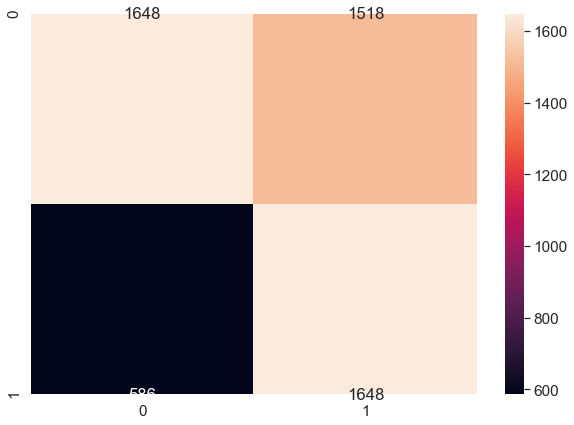

In [58]:
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10, 7))
sb.set(font_scale=1.4)
sb.heatmap(df_cm, annot= True, fmt= 'g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

In addition to making this model more lightwight with a similar accuracy we have gained greater insight on the data as a whole. RFE has helped us to see what the most import fields for predictive power. This knowledge can help us with future data projects when trying to figure out which KPIs will be important predictors. Over time recursive feature elimination will shape our intuitions about relationships in data.

In [59]:
pd.concat([pd.DataFrame(X_train.columns[rfe.support_], columns = ["features"]),
            pd.DataFrame(np.transpose(classifier.coef_), columns= ["coef"])],
         axis = 1)

,features,coef
0,age,-0.152971
1,deposits,0.248991
2,purchases_partners,-0.654100
3,purchases,-0.362654
4,cc_taken,0.110769
5,cc_recommended,0.055074
6,cc_application_begin,0.037003
7,web_user,0.127602
8,ios_user,0.074750
9,registered_phones,0.086678


In [60]:
final_results = pd.concat([y_test, user_identifier], axis = 1).dropna()
final_results["predicted_churn"] = y_pred
final_results = final_results[['user', 'churn', 'predicted_churn']].reset_index(drop= True)

In [61]:
final_results

,user,churn,predicted_churn
0,61353,1.0,1
1,67679,0.0,0
2,21269,0.0,0
3,69531,0.0,1
4,25997,0.0,0
...,...,...,...
5395,22377,0.0,1
5396,24291,1.0,1
5397,23740,0.0,1
5398,47663,1.0,0


This project has helped us to see people who are more likely to churn. The metrics have shown accuracies of around 60% which is pretty good for real world data. 

Slimmed down the model with recursive feature elimination also helps the model will to run faster. In this situation this did not affect the speed significantly. However, this can be a very useful method when dealing with datasets with hundreds of features or if a deep learning model was used instead.

This type of information can help businesses to know not only which customers will churn but also which people are likely to churn, giving stakeholders an opportunity to target customers for marketing. It would also be a good idea to conduct some additional research to find out what customers want or find lacking in the subscription service.